In [1]:
import pandas as pd ## data preprocessing
import matplotlib.pyplot as plt ## data visualisation
import numpy as np # mathematical calculation
import seaborn as sns ## data visualisation 


In [2]:
dataset=pd.read_csv("world-happiness-report.csv")

In [3]:
dataset

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
########### Dublicates values 
for feature in dataset.columns:
    
    print(f"{feature} ---- {dataset.duplicated(feature).sum()}") 

Country name ---- 1783
year ---- 1933
Life Ladder ---- 396
Log GDP per capita ---- 448
Social support ---- 1493
Healthy life expectancy at birth ---- 1120
Freedom to make life choices ---- 1413
Generosity ---- 1339
Perceptions of corruption ---- 1376
Positive affect ---- 1517
Negative affect ---- 1574


In [5]:
duplicate=dataset[dataset.duplicated()]

In [6]:
duplicate

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


In [7]:
dataset.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [8]:
dataset.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


# Finding Numerical data error in dataset

In [10]:
features_with_na =[]
for i in dataset.columns:
    if dataset[i].isnull().sum()>0:        
        features_with_na.append(i)

In [11]:
features_with_na

['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [12]:
dataset[features_with_na].isnull().sum()

Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [13]:
for feature in features_with_na:
    print(feature,round(dataset[feature].isnull().mean(),4)*100)

Log GDP per capita 1.8499999999999999
Social support 0.67
Healthy life expectancy at birth 2.82
Freedom to make life choices 1.6400000000000001
Generosity 4.569999999999999
Perceptions of corruption 5.64
Positive affect 1.13
Negative affect 0.8200000000000001


In [14]:
for i in features_with_na:
    print(i , len(dataset[i].unique()))

Log GDP per capita 1501
Social support 456
Healthy life expectancy at birth 829
Freedom to make life choices 536
Generosity 610
Perceptions of corruption 573
Positive affect 432
Negative affect 375


In [15]:
## Replacing the numerical Missing Values
for feature in features_with_na:
    ## We will replace by using median since there are no outliers
    mean_value = dataset[feature].mean()
    dataset[feature].fillna(mean_value,inplace=True)    


In [16]:
mean_value

0.2685442317640975

In [17]:
dataset[features_with_na].isnull().sum()

Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [18]:
dataset[features_with_na].head(10)

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [19]:
numerical_features =[]
for feature in dataset.columns:
    if dataset[feature].dtypes !="O":
        numerical_features.append(feature)

In [20]:
len(numerical_features)

10

# Year Feature 

In [21]:
year_feature = []
for feature in numerical_features:
    if "year" in feature:
        year_feature.append(feature)

In [22]:
year_feature

['year']

Text(0.5, 1.0, 'year wise Log GDP per capita')

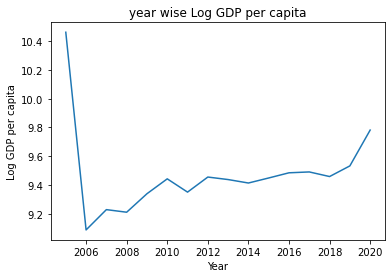

In [23]:
dataset.groupby('year')['Log GDP per capita'].median().plot()
plt.xlabel('Year')
plt.ylabel('Log GDP per capita')
plt.title("year wise Log GDP per capita")

# Discrete Feature

In [24]:
descrete_feature = []
for feature in numerical_features:
    if len(dataset[feature].unique())< 20 and  feature not in year_feature:
        descrete_feature.append(feature)

In [25]:
len(descrete_feature)

0

#### Hence there is no discrete feature in the data 


# Countinous Data

In [26]:
continious_feature = []
for feature in numerical_features:
    if feature not in descrete_feature + year_feature:
        continious_feature.append(feature)

In [27]:
len(continious_feature)



9

In [28]:
dataset[continious_feature]

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...
1944,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


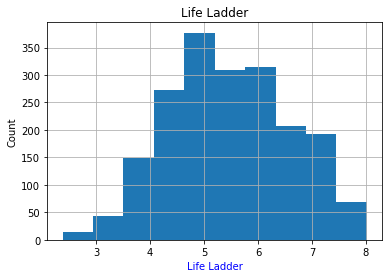

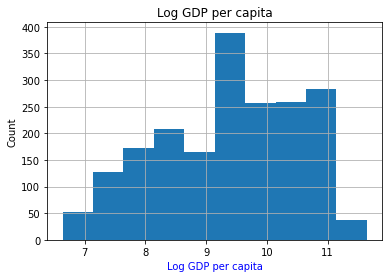

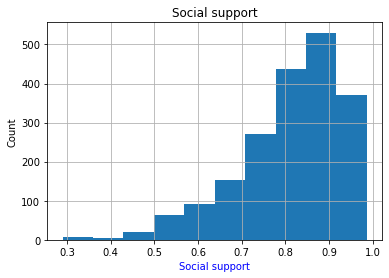

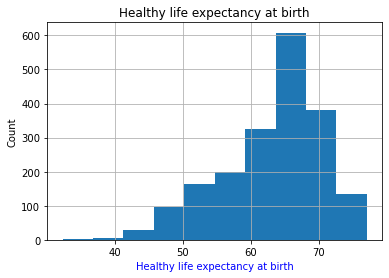

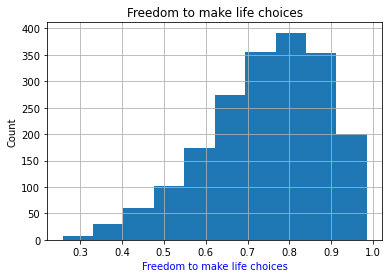

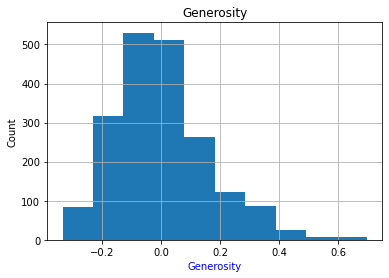

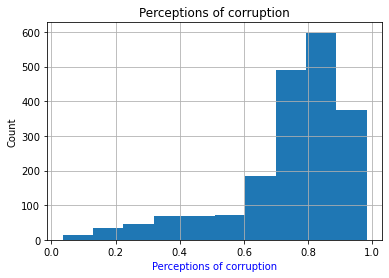

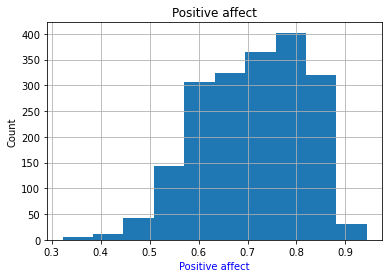

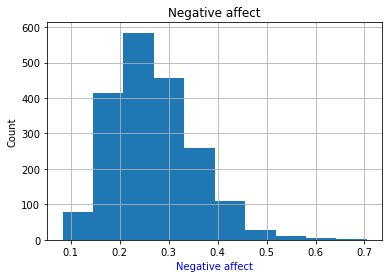

In [29]:
for feature in continious_feature:
    data=dataset.copy()

    data[feature].hist()   
    plt.xlabel(feature , color = "blue")
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


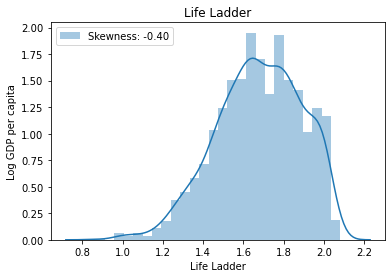

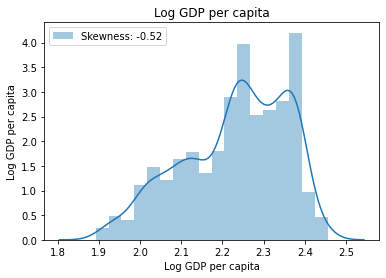

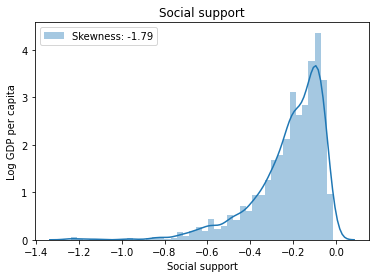

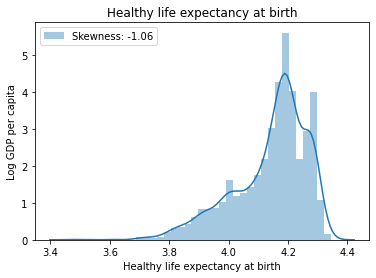

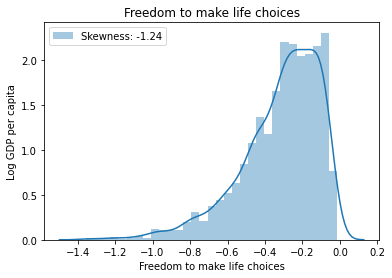

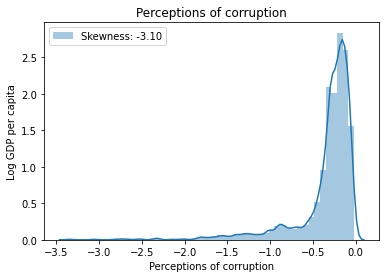

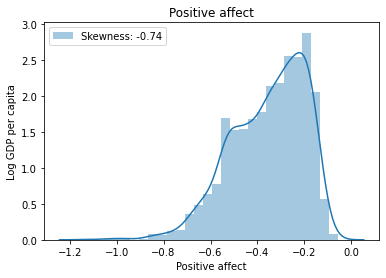

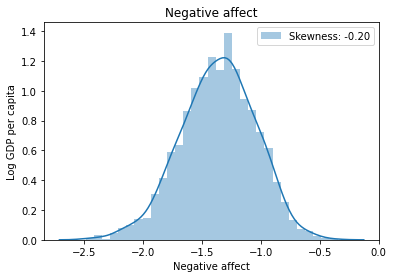

In [30]:
## We will be using logarithmic transformation
for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        ax = sns.distplot(data[feature])
        ax.legend(["Skewness: {:0.2f}".format(data[feature].skew())])
        #data[feature].hist()
        #data['SalePrice']=np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Log GDP per capita')
        plt.title(feature)
        plt.show()        
    

# Outlires

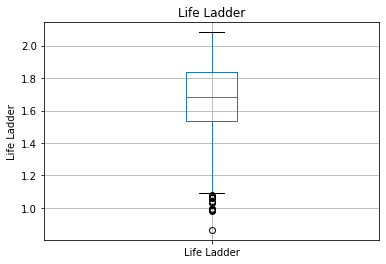

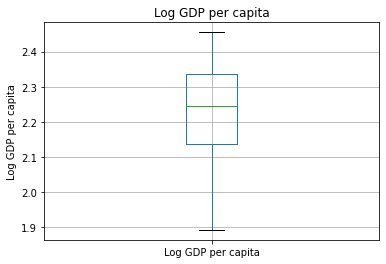

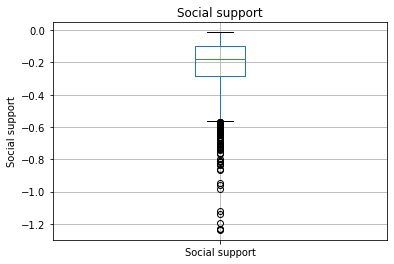

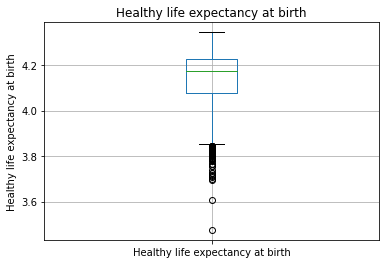

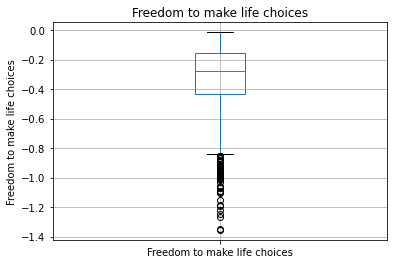

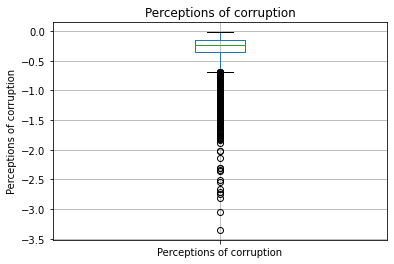

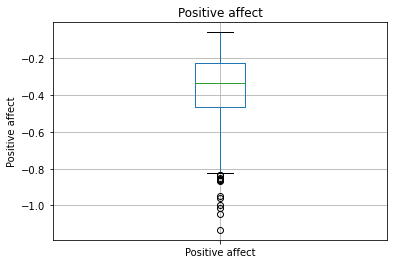

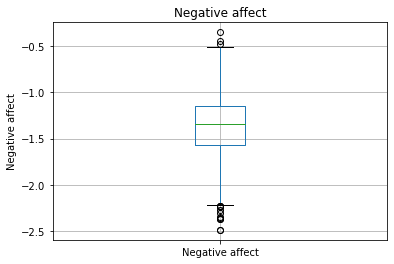

In [31]:
for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        #plt.scatter(data[feature] , data["SalePrice"])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


# IQR 

In [32]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                                7.000
Life Ladder                         1.643
Log GDP per capita                  1.857
Social support                      0.154
Healthy life expectancy at birth    9.500
Freedom to make life choices        0.205
Generosity                          0.191
Perceptions of corruption           0.169
Positive affect                     0.171
Negative affect                     0.112
dtype: float64


# Check Correlation

In [33]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(1626, 11)

In [34]:
dataset.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.020424,0.060866,-0.038326,0.139154,0.231022,-0.041681,-0.090074,-0.016741,0.205901
Life Ladder,0.020424,1.000000,0.736186,0.646961,0.696621,0.427772,0.113803,-0.246104,0.459773,-0.168111
Log GDP per capita,0.060866,0.736186,1.000000,0.630372,0.809159,0.231167,-0.118638,-0.102441,0.197304,-0.100245
Social support,-0.038326,0.646961,0.630372,1.000000,0.542949,0.314194,-0.002281,-0.087929,0.343629,-0.321553
Healthy life expectancy at birth,0.139154,0.696621,0.809159,0.542949,1.000000,0.263658,-0.052715,-0.127474,0.222853,-0.011784
Freedom to make life choices,0.231022,0.427772,0.231167,0.314194,0.263658,1.000000,0.271092,-0.359686,0.551253,-0.157963
Generosity,-0.041681,0.113803,-0.118638,-0.002281,-0.052715,0.271092,1.000000,-0.148540,0.295211,-0.044549
Perceptions of corruption,-0.090074,-0.246104,-0.102441,-0.087929,-0.127474,-0.359686,-0.148540,1.000000,-0.222103,0.139178
Positive affect,-0.016741,0.459773,0.197304,0.343629,0.222853,0.551253,0.295211,-0.222103,1.000000,-0.284519
Negative affect,0.205901,-0.168111,-0.100245,-0.321553,-0.011784,-0.157963,-0.044549,0.139178,-0.284519,1.000000


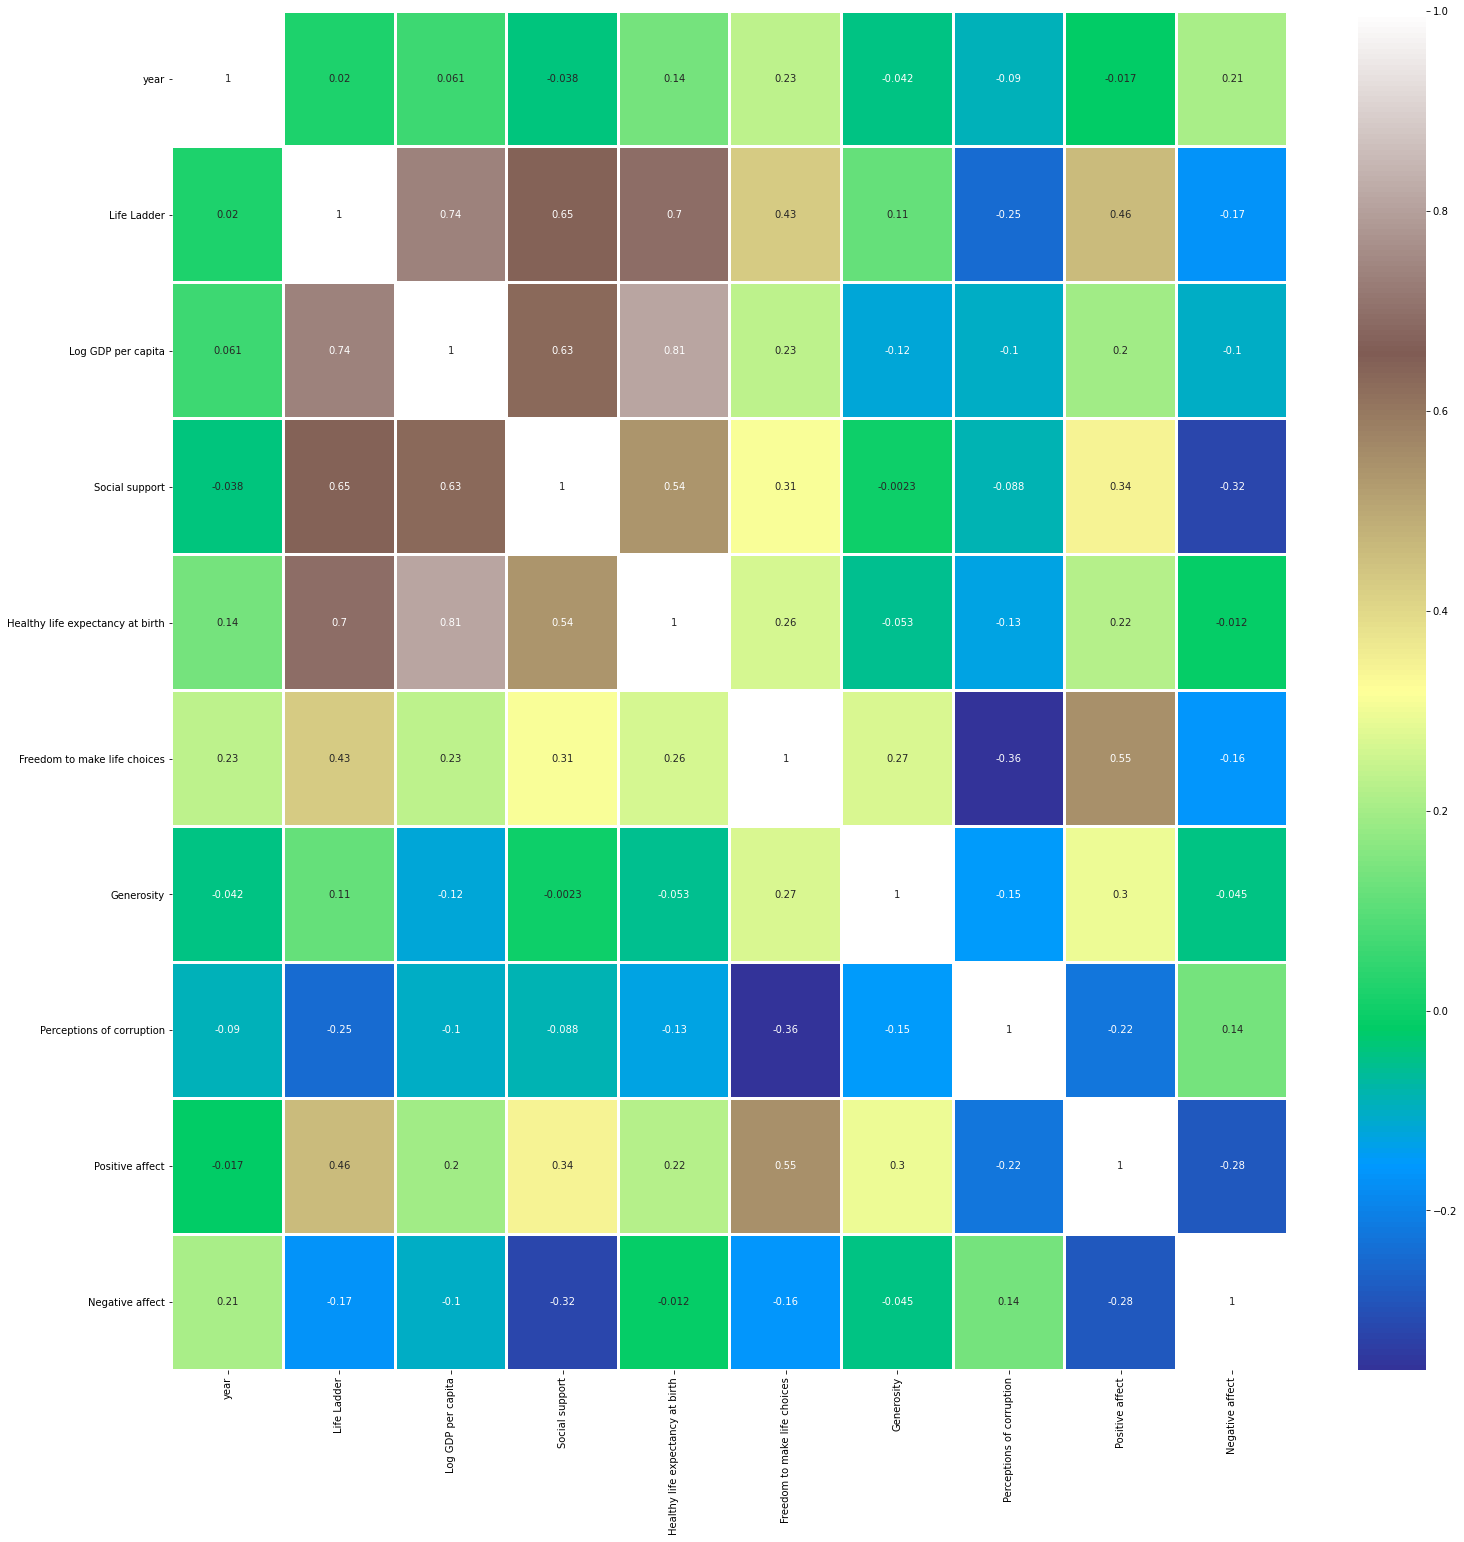

In [35]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(dataset.corr(), cmap = 'terrain', annot=True, linewidth=2,square=False,)

# Categorical Variables

In [36]:
categorical_features = []
for feature in dataset.columns:
    if data[feature].dtypes=='O':
        categorical_features.append(feature)
print(categorical_features)  
len(categorical_features)

['Country name']


1

In [37]:
for feature in categorical_features:    
    print(feature,len(dataset[feature].unique()))

Country name 156


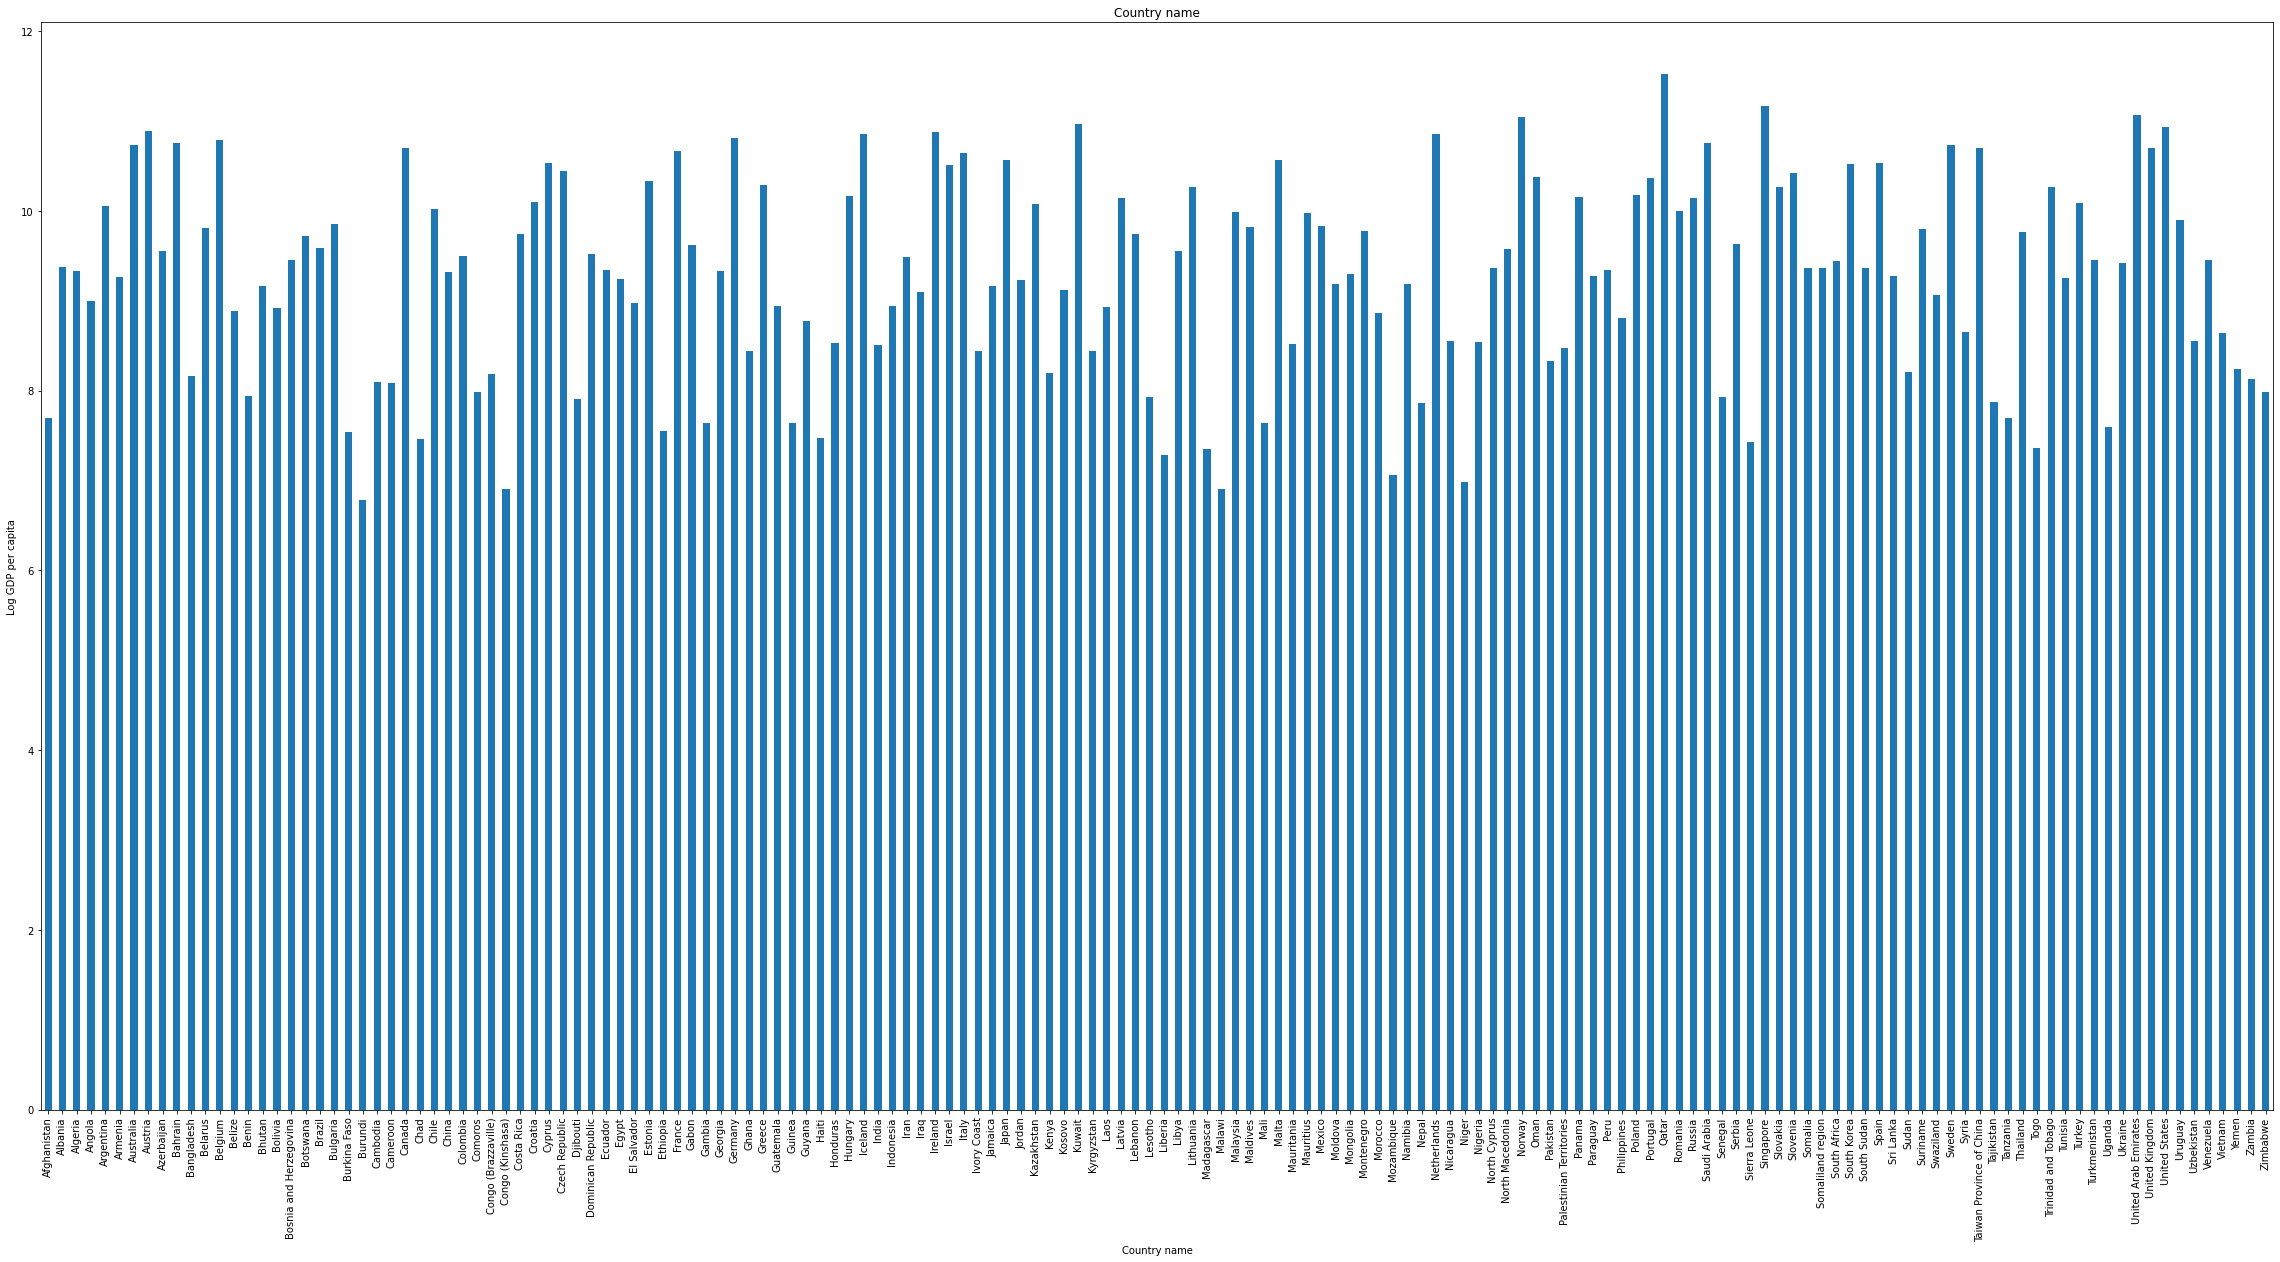

In [38]:
for feature in categorical_features:
    data=dataset.copy()
    plt.figure(figsize=(40,20))

    dataset.groupby(feature)['Log GDP per capita'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Log GDP per capita')
    plt.title(feature)
    plt.show()

In [39]:
dataset

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [40]:
dataset.shape

(1626, 11)

In [42]:
import jovian

<IPython.core.display.Javascript object>

In [43]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/umair3036/world-happiness-report-2021


'https://jovian.ai/umair3036/world-happiness-report-2021'